# Garbage Image Classification

## Objective 
To classify type of garbage in an image.  
This dataset contains 6 types of garbage;  
- cardboard (393 images)  
- glass (491 images)  
- metal (400 images)  
- paper (584 images)  
- plastic (472 images)  
- trash (127 images)

## Dataset
source : https://www.kaggle.com/asdasdasasdas/garbage-classification

## Data analysis

### Check types of garbage images

In [12]:
import os

dataset_path = os.path.join(os.getcwd(), 'images')
garbage_types = os.listdir(dataset_path)
garbage_types

['trash', 'glass', 'paper', 'metal', 'cardboard', 'plastic']

In [13]:
# number of images in each folder

for garbage in garbage_types:
    print(garbage, ' : ', len(os.listdir(os.path.join(dataset_path, garbage))))

trash  :  137
glass  :  501
paper  :  594
metal  :  410
cardboard  :  403
plastic  :  482


# Data preparation
Originally, we're given a folder of images with subfolder in type of garbage;  
cardboard, glass, metal, paper, plastic, and trash.  
And we're given the name of image files that are categorized into train, val, and test dataset  
as shown in 3 text files :  
- one-indexed-files-notrash_train.txt
- one-indexed-files-notrash_test.txt
- one-indexed-files-notrash_val.txt

In this preparation part, we're going to make folders (or directories) suitable for ingesting image data  
to our model with keras.preprocessing.image.ImageDataGenerator.

In [14]:
import shutil

In [15]:
# define path for source folder and destination folder
source_path = os.path.join(os.getcwd(), 'images')
data_path = os.path.join(os.getcwd(), 'data')

In [16]:
# create new directory for dataset
if not os.path.exists(data_path):
    os.makedirs(data_path)

# create train, test, and val directories
for folder in ['train', 'test', 'val']:
    target_path = os.path.join(data_path, folder)
    if not os.path.exists(target_path):
        os.makedirs(target_path)

In [18]:
!tree data

data
├── test
├── train
└── val

3 directories, 0 files


In [19]:
# create cardboard, glass, metal, paper, plastic and trash directories in each directory
for dataset in ['train', 'test', 'val']:
    dataset_path = os.path.join(data_path, dataset)
    for folder in garbage_types:
        target_path = os.path.join(dataset_path, folder)
        if not os.path.exists(target_path):
            os.makedirs(target_path)

In [20]:
!ls -al data/train

total 32
drwxr-xr-x 8 samantha samantha 4096 ม.ค.  22 11:02 .
drwxr-xr-x 5 samantha samantha 4096 ม.ค.  22 11:02 ..
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 cardboard
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 glass
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 metal
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 paper
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 plastic
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 trash


In [21]:
!ls -al data/val

total 32
drwxr-xr-x 8 samantha samantha 4096 ม.ค.  22 11:02 .
drwxr-xr-x 5 samantha samantha 4096 ม.ค.  22 11:02 ..
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 cardboard
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 glass
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 metal
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 paper
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 plastic
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 trash


In [22]:
!ls -al data/test

total 32
drwxr-xr-x 8 samantha samantha 4096 ม.ค.  22 11:02 .
drwxr-xr-x 5 samantha samantha 4096 ม.ค.  22 11:02 ..
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 cardboard
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 glass
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 metal
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 paper
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 plastic
drwxr-xr-x 2 samantha samantha 4096 ม.ค.  22 11:02 trash


In [23]:
# occupy each directory of training dataset
with open('one-indexed-files-notrash_train.txt') as file:
    temp = file.readlines()

temp = [item.split()[0] for item in temp]

for file in temp:
    for folder in garbage_types:
        if folder in file:
            src_img = os.path.join(source_path, folder+'/'+file)
            dst_img = os.path.join(data_path, 'train/'+folder+'/'+file)
            if not os.path.exists(dst_img):
                shutil.copyfile(src_img, dst_img)

In [24]:
# occupy each directory of validation dataset
with open('one-indexed-files-notrash_val.txt') as file:
    temp = file.readlines()

temp = [item.split()[0] for item in temp]

for file in temp:
    for folder in garbage_types:
        if folder in file:
            src_img = os.path.join(source_path, folder+'/'+file)
            dst_img = os.path.join(data_path, 'val/'+folder+'/'+file)
            if not os.path.exists(dst_img):
                shutil.copyfile(src_img, dst_img)

In [25]:
# occupy each directory of test dataset
with open('one-indexed-files-notrash_test.txt') as file:
    temp = file.readlines()

temp = [item.split()[0] for item in temp]

for file in temp:
    for folder in garbage_types:
        if folder in file:
            src_img = os.path.join(source_path, folder+'/'+file)
            dst_img = os.path.join(data_path, 'test/'+folder+'/'+file)
            if not os.path.exists(dst_img):
                shutil.copyfile(src_img, dst_img)

In [12]:
#!tree data/train

## Create data generator for train and validation sets (without data augmentation)
Possible augmentation : https://keras.io/api/preprocessing/image/#imagedatagenerator-class

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
# create data generator without data augmentation
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

batch_size = 20
train_iter = train_gen.flow_from_directory('data/train',target_size=(128, 128), batch_size=batch_size, class_mode='categorical')
val_iter = val_gen.flow_from_directory('data/val',target_size=(128, 128), batch_size=batch_size, class_mode='categorical')
test_iter = test_gen.flow_from_directory('data/test',target_size=(128, 128), batch_size=batch_size, class_mode='categorical')

Found 1768 images belonging to 6 classes.
Found 328 images belonging to 6 classes.
Found 431 images belonging to 6 classes.


### Get first batch of training set

In [29]:
# first batch of training set
train_samples = next(train_iter)

In [30]:
import numpy as np

# explore the batches
print('training set : first batch')
print('len : ', len(train_samples))
print('train_samples[0]')
print('\tshape : ', np.array(train_samples[0]).shape)
print('\texample : ')
print(np.array(train_samples[0][0]))
print('train_samples[1]')
print('\tshape : ', np.array(train_samples[1]).shape)
print('\texample : ', np.array(train_samples[1][0]))

training set : first batch
len :  2
train_samples[0]
	shape :  (20, 128, 128, 3)
	example : 
[[[0.8862746  0.87843144 0.8313726 ]
  [0.87843144 0.8705883  0.8235295 ]
  [0.86666673 0.8588236  0.8117648 ]
  ...
  [0.53333336 0.5294118  0.50980395]
  [0.5294118  0.5254902  0.5058824 ]
  [0.5294118  0.5254902  0.5058824 ]]

 [[0.8862746  0.87843144 0.8313726 ]
  [0.87843144 0.8705883  0.8235295 ]
  [0.86666673 0.8588236  0.8117648 ]
  ...
  [0.5294118  0.5254902  0.5058824 ]
  [0.5294118  0.5254902  0.5058824 ]
  [0.5294118  0.5254902  0.5058824 ]]

 [[0.8862746  0.87843144 0.8313726 ]
  [0.87843144 0.8705883  0.8235295 ]
  [0.86666673 0.8588236  0.8117648 ]
  ...
  [0.5254902  0.52156866 0.5019608 ]
  [0.5294118  0.5254902  0.5058824 ]
  [0.5294118  0.5254902  0.5058824 ]]

 ...

 [[0.9490197  0.94117653 0.89019614]
  [0.94117653 0.9333334  0.882353  ]
  [0.93725497 0.9294118  0.87843144]
  ...
  [0.58431375 0.57254905 0.5529412 ]
  [0.5882353  0.5764706  0.5568628 ]
  [0.5764706  0.5647

### get labels

In [31]:
labels = train_iter.class_indices.items()
labels

dict_items([('cardboard', 0), ('glass', 1), ('metal', 2), ('paper', 3), ('plastic', 4), ('trash', 5)])

In [32]:
labels_dict = dict((v,k) for k,v in labels)
labels_dict

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [33]:
# save the labels_dict for use later in other files
import json

json.dump(labels_dict, open('labels_dict.json','w'))

In [34]:
# test loading the labels_dict for use
temp = json.load(open('labels_dict.json'))
temp

{'0': 'cardboard',
 '1': 'glass',
 '2': 'metal',
 '3': 'paper',
 '4': 'plastic',
 '5': 'trash'}

### Plot sample images from first training batch

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

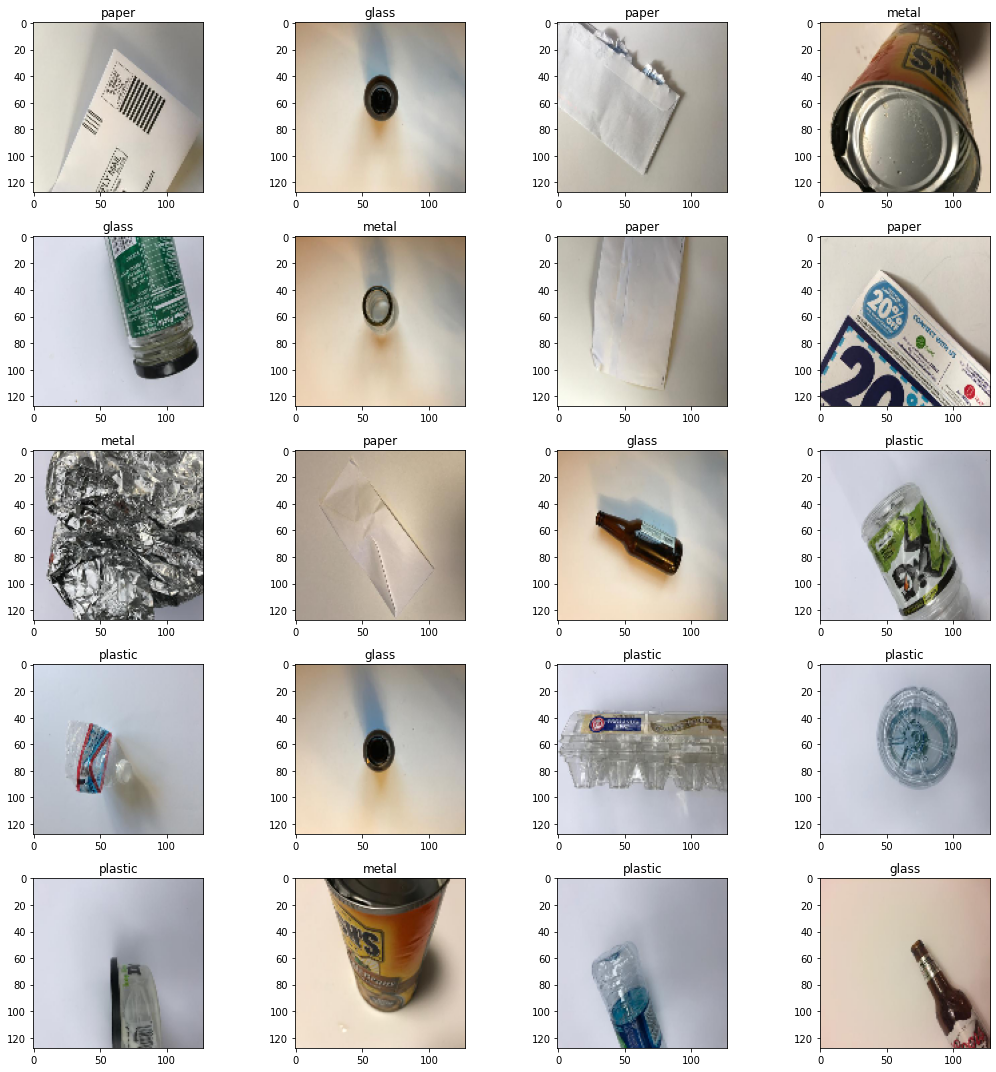

In [36]:
fig = plt.figure(figsize=(15,15))

for i in range(20):
    fig.add_subplot(5,4,i+1)
    plt.imshow(train_samples[0][i])
    plt.title(labels_dict[train_samples[1][i].argmax()])
plt.tight_layout()
plt.show()